           date  price_bitcoin  price_ethereum  price_usdcoin  \
0    2020-11-04   13989.976358      387.616374       0.999273   
1    2020-11-05   14101.716051      401.733097       0.999408   
2    2020-11-06   15553.331701      415.927770       0.997304   
3    2020-11-07   15548.312145      454.651543       0.997930   
4    2020-11-08   14818.458911      435.418354       0.998251   
...         ...            ...             ...            ...   
1235 2024-03-23   63509.044965     3322.891277       1.000441   
1236 2024-03-24   64285.802791     3353.371242       0.999066   
1237 2024-03-25   67310.983268     3454.257071       0.999945   
1238 2024-03-26   69938.945302     3588.493402       1.000579   
1239 2024-03-27   70082.051225     3591.548528       0.999968   

      price_axieinfinity  Diferencia_Precio  
0               0.145700       13601.215012  
1               0.145700       13698.837846  
2               0.134893       15136.271734  
3               0.142960       1509

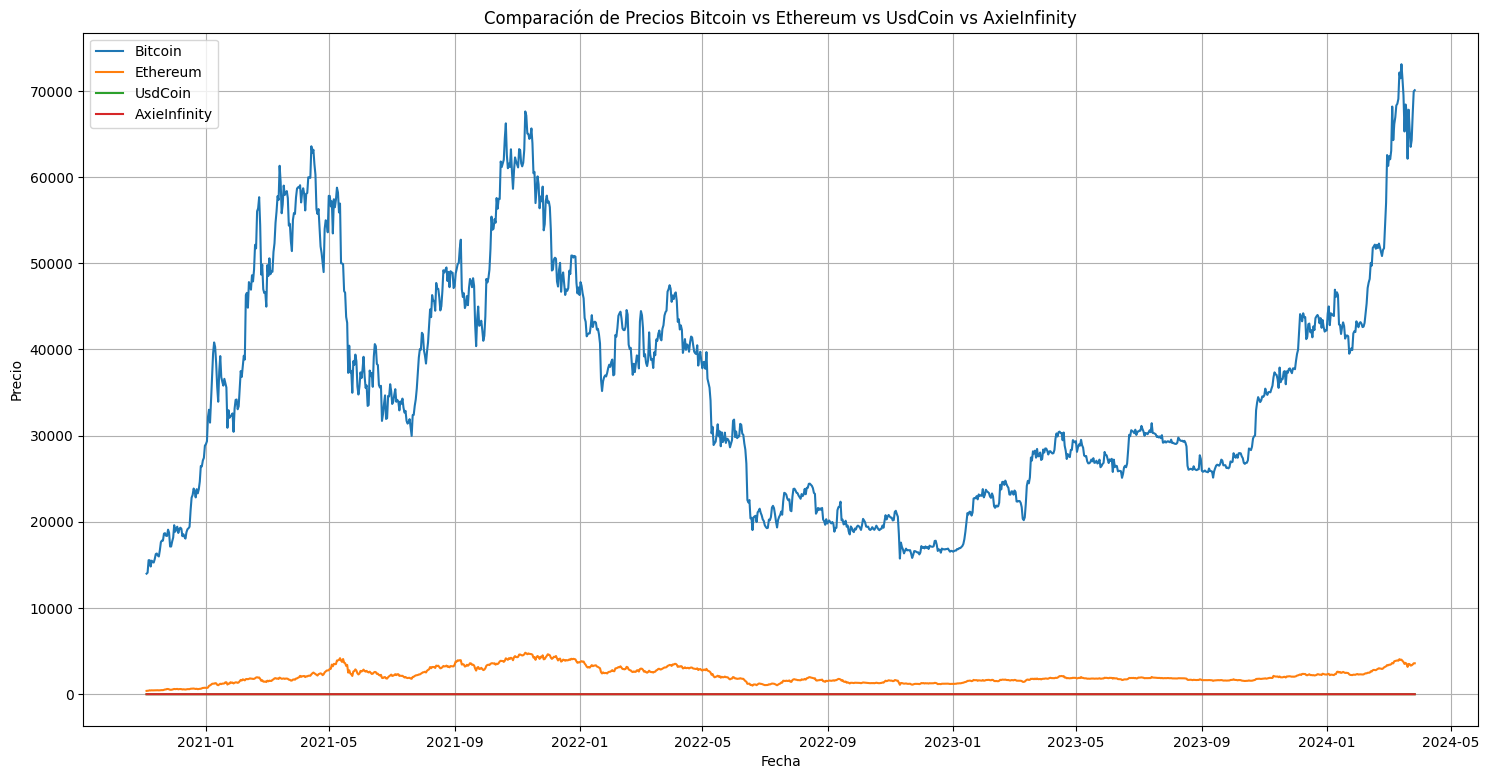

In [61]:


import pandas as pd
import matplotlib.pyplot as plt

# Cargar los archivos CSV en DataFrames
bitcoin_df = pd.read_csv('files/bitcoin.csv')
ethereum_df = pd.read_csv('files/ethereum.csv')
usdcoin_df = pd.read_csv('files/usd-coin.csv')
axieinfinity_df = pd.read_csv('files/axie-infinity.csv')

# Asegurarse de que las columnas de fecha tengan el mismo formato
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date'])
ethereum_df['date'] = pd.to_datetime(ethereum_df['date'])
usdcoin_df ['date'] = pd.to_datetime(usdcoin_df['date'])
axieinfinity_df ['date'] = pd.to_datetime(axieinfinity_df['date'])


# Fusionar los DataFrames por la fecha
merged_df = pd.merge(bitcoin_df, ethereum_df, on='date', how='inner', suffixes=('_bitcoin', '_ethereum'))

merged_df = pd.merge(merged_df, usdcoin_df, on='date', how='inner', suffixes=('', '_usdcoin'))

merged_df = pd.merge(merged_df, axieinfinity_df, on='date', how='inner', suffixes=('_usdcoin', '_axieinfinity'))



# Comparar el precio
merged_df['Diferencia_Precio'] = merged_df['price_bitcoin'] - merged_df['price_ethereum'] - merged_df['price_usdcoin'] - merged_df['price_axieinfinity']

# Mostrar el DataFrame con la comparación
print(merged_df[['date', 'price_bitcoin', 'price_ethereum', 'price_usdcoin', 'price_axieinfinity',  'Diferencia_Precio']])

# Graficar los precios
plt.figure(figsize=(18, 9))
plt.plot(merged_df['date'], merged_df['price_bitcoin'], label='Bitcoin')
plt.plot(merged_df['date'], merged_df['price_ethereum'], label='Ethereum')
plt.plot(merged_df['date'], merged_df['price_usdcoin'], label = 'UsdCoin')
plt.plot(merged_df['date'], merged_df['price_usdcoin'], label = 'AxieInfinity')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Comparación de Precios Bitcoin vs Ethereum vs UsdCoin vs AxieInfinity')
plt.legend()
plt.grid(True)
plt.show()